<a href="https://colab.research.google.com/github/Roterdamjr/Mestrado/blob/main/Daniel_Palomar_Adaptado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando a Base

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


pd.options.mode.chained_assignment = None
df_raw = pd.read_csv('/content/kc_house_data.csv')

# separa duas Bases: 2014 e 2015
df_raw['date'] = pd.to_datetime(df_raw['date'])
df_raw['year'] = df_raw['date'].dt.year
df_raw_2014 = df_raw[ df_raw['year'] == 2014]
df_raw_2015 = df_raw[ df_raw['year'] == 2015]

df_raw_2014 = df_raw_2014.drop(columns='year')
df_raw_2015 = df_raw_2015.drop(columns='year')

len(df_raw_2014),  len(df_raw_2015)

RANDOM_STATE = 4755
np.random.seed(RANDOM_STATE)

In [ ]:
#demais features
data14 = df_raw_2014.iloc[:, 3:].copy()
data15 = df_raw_2015.iloc[:, 3:].copy()

data14 =data14.drop(columns= ['zipcode', 'lat', 'long'])
data15 =data15.drop(columns= ['zipcode', 'lat', 'long'])

#--> preco
y14 = df_raw_2014.iloc[:, 2].copy()
y15 = df_raw_2015.iloc[:, 2].copy()

# visualizar a base: data14 e data15

CONDITION:

1 → Muito ruim (casa em péssimo estado, precisa de reformas urgentes)

2 → Ruim (problemas estruturais ou de manutenção evidentes)

3 → Média (condição típica para a idade do imóvel, habitável, mas com sinais de desgaste)

4 → Boa (bem mantida, poucos reparos necessários)

5 → Excelente (estado impecável, como novo ou recém-reformado)

In [ ]:
data14

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,2270,5731
21605,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,2520,6023
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007


<Axes: >

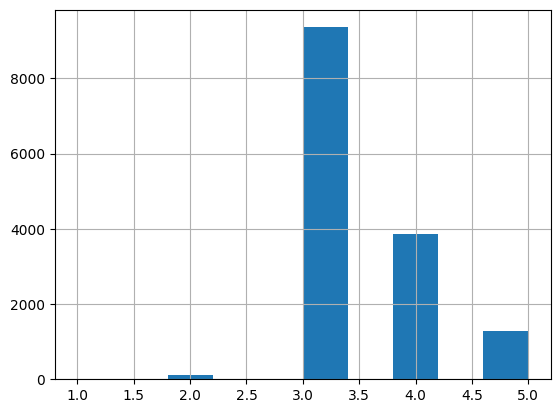

In [ ]:
data14['condition'].hist()

VIEW:

0 → Sem vista especial ou relevante.

1 → Vista ruim ou pouco atrativa.

2 → Vista média (melhor que nada, mas não impressiona).

3 → Boa vista (ex.: lago, montanha ou área verde agradável).

4 → Vista excelente/panorâmica (alto valor estético e valorização).

<Axes: >

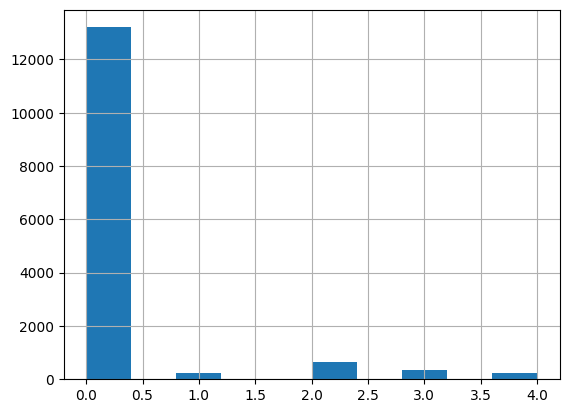

In [ ]:
data14['view'].hist()

WATER:

0 → Não é à beira d’água.

1 → É à beira d’água (possui acesso ou vista direta para o corpo d’água).

<Axes: >

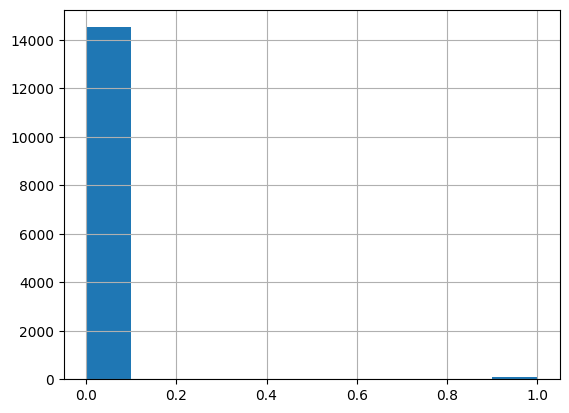

In [ ]:
data14['waterfront'].hist()

1 a 3: Muito abaixo do padrão (qualidade baixa, construção simples ou antiga, acabamento ruim)

4 a 6: Padrão abaixo da média (construção mais simples, menos recursos)

7 a 8: Padrão médio (construção normal para a região, acabamento razoável)

9 a 10: Padrão acima da média (boa qualidade, materiais melhores, design mais elaborado)

11 a 13: Alto padrão (construção de luxo, acabamento premium, detalhes arquitetônicos sofisticados)

<Axes: >

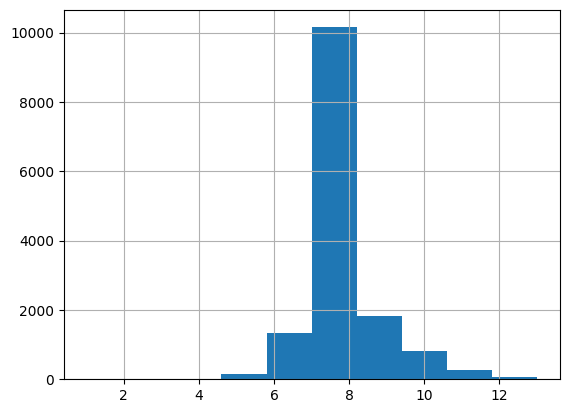

In [ ]:
data14['grade'].hist()

y14

(array([7.537e+03, 5.388e+03, 1.079e+03, 3.490e+02, 1.390e+02, 5.200e+01,
        3.900e+01, 2.200e+01, 1.200e+01, 7.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([  78000.,  459100.,  840200., 1221300., 1602400., 1983500.,
        2364600., 2745700., 3126800., 3507900., 3889000., 4270100.,
        4651200., 5032300., 5413400., 5794500., 6175600., 6556700.,
        6937800., 7318900., 7700000.]),
 <BarContainer object of 20 artists>)

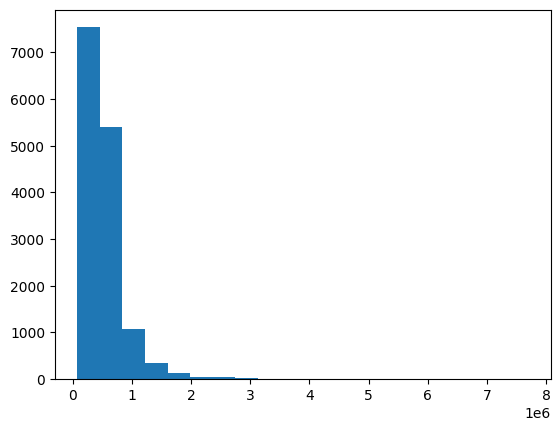

In [ ]:
plt.hist(y14,bins=20)

# visualizar

In [ ]:
# --- Visualization: annual returns ---
def plot_returns_histogram(y, year):
    plt.figure(figsize=(8, 5))
    min_val = np.floor(y.min() * 20) / 20
    max_val = np.ceil(y.max() * 20) / 208
    num_bins = int((max_val - min_val) * 20)
    if num_bins <= 0: num_bins = 10
    plt.hist(y, bins=num_bins, density=True, alpha=0.7, label='Returns Distribution')

    plt.xlim(-1, 4)
    plt.title(f'{year} Returns Histogram')
    plt.xlabel("Returns")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

plot_returns_histogram(y14, 2014)
plot_returns_histogram(y15, 2015)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ecb7c6fa8e0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ecb7c6f82c0> (for post_execute):


KeyboardInterrupt: 

Visualizing boxplot of all features (2016)...


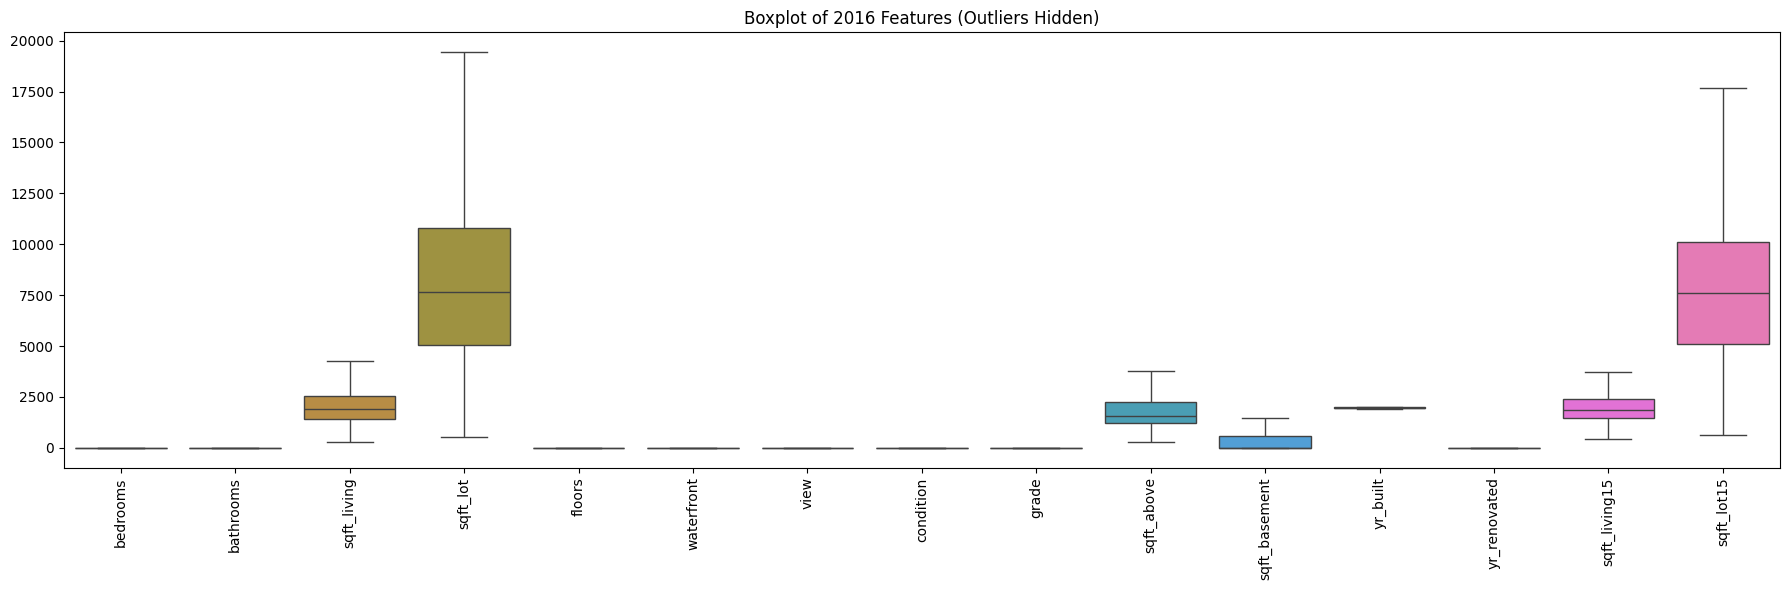

In [ ]:
# --- Visualization: boxplot for all the variables ---
print("Visualizing boxplot of all features (2016)...")
plt.figure(figsize=(18, 6))
sns.boxplot(data=data14, showfliers=False) # showfliers=False similar to outline=FALSE
plt.xticks(rotation=90)
plt.title("Boxplot of 2016 Features (Outliers Hidden)")
plt.tight_layout()
plt.show()

Matriz de correlação em 2014

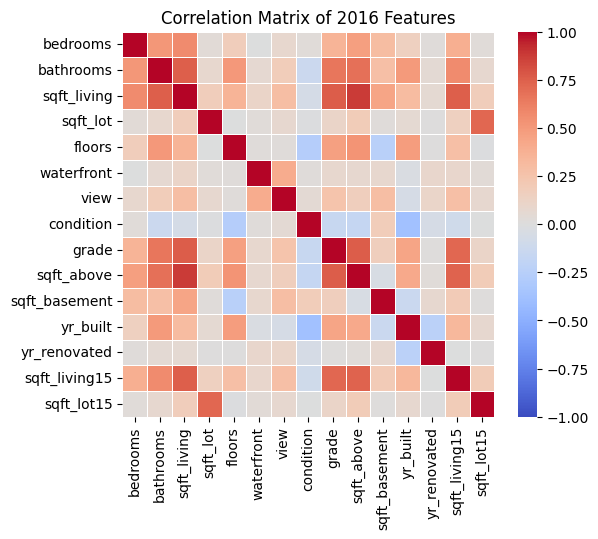

In [ ]:
corr_matrix14 = data14.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix14, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt=".1f", linewidths=.5) # annot=False for speed like corrplot
plt.title("Correlation Matrix of 2016 Features")
plt.show()

# Entendendo codigo

In [ ]:
# cutoff: limite acima do qual as colunas serao excluidas
cutoff = 0.7
#matriz de correlacao
df_corr = data14.corr()

highly_correlated_final = set()
corr_matrix_abs = df_corr.abs()
#monta mariz triangular
corr_matrix_upper_abs = corr_matrix_abs.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
corr_matrix_upper_abs

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
price,NaN,0.307914,0.531595,0.712431,0.084700,0.262530,0.272797,0.398904,0.040841,0.670163,0.616306,0.329027,0.050604,0.134014,0.052022,0.297503,0.023589,0.583507,0.075156,NaN
bedrooms,NaN,NaN,0.511316,0.568988,0.032237,0.175028,0.003295,0.079449,0.029054,0.353937,0.471832,0.300744,0.151314,0.017112,0.151141,0.012284,0.132999,0.387766,0.027320,NaN
bathrooms,NaN,NaN,NaN,0.752730,0.083346,0.501092,0.064778,0.185158,0.126487,0.662438,0.683456,0.287505,0.496734,0.050484,0.202583,0.031384,0.221301,0.569062,0.077249,NaN
sqft_living,NaN,NaN,NaN,NaN,0.178482,0.354969,0.110288,0.289373,0.062619,0.761956,0.876224,0.441072,0.309392,0.059979,0.195609,0.055294,0.238778,0.757351,0.178850,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,0.003079,0.029487,0.078023,0.010134,0.114398,0.189122,0.017764,0.057586,0.007544,0.139330,0.094535,0.229603,0.155957,0.724491,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,0.017543,0.021255,0.269432,0.462286,0.525481,0.242811,0.481562,0.006884,0.060387,0.051061,0.126952,0.285022,0.010740,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403544,0.017535,0.081996,0.076624,0.085916,0.023736,0.088407,0.035380,0.019878,0.047732,0.086810,0.032395,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052079,0.254747,0.164762,0.292999,0.055067,0.104142,0.086635,0.003664,0.079947,0.281595,0.072090,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149567,0.166810,0.180854,0.381309,0.062042,0.016403,0.002838,0.121908,0.099504,0.005209,NaN
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758289,0.167265,0.439306,0.014694,0.184818,0.115760,0.201521,0.719106,0.114507,NaN


1o ciclo

In [ ]:
# max_corr -> maior correlacao dentro da matriz
max_corr = corr_matrix_upper_abs.max().max()

# Find the pair with this highest correlation
row_idx, col_idx = np.where(corr_matrix_upper_abs == max_corr)
col1 = corr_matrix_upper_abs.index[row_idx[0]]
col2 = corr_matrix_upper_abs.columns[col_idx[0]]

col1, col2,max_corr

('sqft_living', 'sqft_above', 0.8762238475456148)

In [ ]:
# Dentro do par escolhe a que tem amior correlacao com as demais, colocando em 'highly_correlated_final'
mean_abs_corr1 = corr_matrix_abs[col1].mean()
mean_abs_corr2 = corr_matrix_abs[col2].mean()

# Add the column with the higher mean absolute correlation to the set to remove
if mean_abs_corr1 > mean_abs_corr2:
    col_to_remove = col1
else:
    col_to_remove = col2 # If equal, remove the second one
highly_correlated_final.add(col_to_remove)

col_to_remove

'sqft_living'

In [ ]:
# seta pra 0 a linha e coluna da feature escolhida
corr_matrix_upper_abs.loc[col_to_remove, :] = 0
corr_matrix_upper_abs.loc[:, col_to_remove] = 0
corr_matrix_upper_abs

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
price,NaN,0.307914,0.531595,0.0,0.084700,0.262530,0.272797,0.398904,0.040841,0.670163,0.616306,0.329027,0.050604,0.134014,0.052022,0.297503,0.023589,0.583507,0.075156,NaN
bedrooms,NaN,NaN,0.511316,0.0,0.032237,0.175028,0.003295,0.079449,0.029054,0.353937,0.471832,0.300744,0.151314,0.017112,0.151141,0.012284,0.132999,0.387766,0.027320,NaN
bathrooms,NaN,NaN,NaN,0.0,0.083346,0.501092,0.064778,0.185158,0.126487,0.662438,0.683456,0.287505,0.496734,0.050484,0.202583,0.031384,0.221301,0.569062,0.077249,NaN
sqft_living,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sqft_lot,NaN,NaN,NaN,0.0,NaN,0.003079,0.029487,0.078023,0.010134,0.114398,0.189122,0.017764,0.057586,0.007544,0.139330,0.094535,0.229603,0.155957,0.724491,NaN
floors,NaN,NaN,NaN,0.0,NaN,NaN,0.017543,0.021255,0.269432,0.462286,0.525481,0.242811,0.481562,0.006884,0.060387,0.051061,0.126952,0.285022,0.010740,NaN
waterfront,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.403544,0.017535,0.081996,0.076624,0.085916,0.023736,0.088407,0.035380,0.019878,0.047732,0.086810,0.032395,NaN
view,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.052079,0.254747,0.164762,0.292999,0.055067,0.104142,0.086635,0.003664,0.079947,0.281595,0.072090,NaN
condition,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.149567,0.166810,0.180854,0.381309,0.062042,0.016403,0.002838,0.121908,0.099504,0.005209,NaN
grade,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.758289,0.167265,0.439306,0.014694,0.184818,0.115760,0.201521,0.719106,0.114507,NaN


2o ciclo

In [ ]:
# max_corr -> maior correlacao dentro da matriz
max_corr = corr_matrix_upper_abs.max().max()

# Find the pair with this highest correlation
row_idx, col_idx = np.where(corr_matrix_upper_abs == max_corr)
col1 = corr_matrix_upper_abs.index[row_idx[0]]
col2 = corr_matrix_upper_abs.columns[col_idx[0]]

col1, col2,max_corr

('grade', 'sqft_above', 0.7582893885251866)

In [ ]:
# Dentro do par escolhe a que tem amior correlacao com as demais, colocando em 'highly_correlated_final'
mean_abs_corr1 = corr_matrix_abs[col1].mean()
mean_abs_corr2 = corr_matrix_abs[col2].mean()

# Add the column with the higher mean absolute correlation to the set to remove
if mean_abs_corr1 > mean_abs_corr2:
    col_to_remove = col1
else:
    col_to_remove = col2 # If equal, remove the second one
highly_correlated_final.add(col_to_remove)

col_to_remove

'sqft_above'

In [ ]:
# seta pra 0 a linha e coluna da feature escolhida
corr_matrix_upper_abs.loc[col_to_remove, :] = 0
corr_matrix_upper_abs.loc[:, col_to_remove] = 0
corr_matrix_upper_abs

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
price,NaN,0.307914,0.531595,0.0,0.084700,0.262530,0.272797,0.398904,0.040841,0.670163,0.0,0.329027,0.050604,0.134014,0.052022,0.297503,0.023589,0.583507,0.075156,NaN
bedrooms,NaN,NaN,0.511316,0.0,0.032237,0.175028,0.003295,0.079449,0.029054,0.353937,0.0,0.300744,0.151314,0.017112,0.151141,0.012284,0.132999,0.387766,0.027320,NaN
bathrooms,NaN,NaN,NaN,0.0,0.083346,0.501092,0.064778,0.185158,0.126487,0.662438,0.0,0.287505,0.496734,0.050484,0.202583,0.031384,0.221301,0.569062,0.077249,NaN
sqft_living,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sqft_lot,NaN,NaN,NaN,0.0,NaN,0.003079,0.029487,0.078023,0.010134,0.114398,0.0,0.017764,0.057586,0.007544,0.139330,0.094535,0.229603,0.155957,0.724491,NaN
floors,NaN,NaN,NaN,0.0,NaN,NaN,0.017543,0.021255,0.269432,0.462286,0.0,0.242811,0.481562,0.006884,0.060387,0.051061,0.126952,0.285022,0.010740,NaN
waterfront,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.403544,0.017535,0.081996,0.0,0.085916,0.023736,0.088407,0.035380,0.019878,0.047732,0.086810,0.032395,NaN
view,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.052079,0.254747,0.0,0.292999,0.055067,0.104142,0.086635,0.003664,0.079947,0.281595,0.072090,NaN
condition,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.149567,0.0,0.180854,0.381309,0.062042,0.016403,0.002838,0.121908,0.099504,0.005209,NaN
grade,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.167265,0.439306,0.014694,0.184818,0.115760,0.201521,0.719106,0.114507,NaN


In [ ]:
# executa as outra colunas ate não achar nunhma correlaçao que es=xtraooel o cutoff
max_corr = corr_matrix_upper_abs.max().max()
if max_corr < cutoff:
    break # No more correlations above cutoff

# Excluindo features altamente relacionadas

Finding highly correlated features (cutoff=0.9)...
Columns to drop due to high correlation: ['sqft_living']
Data 2016 shape after removing correlated features: (14633, 14)
Data 2017 shape after removing correlated features: (6980, 14)
Visualizing correlation matrix after removing highly correlated features...


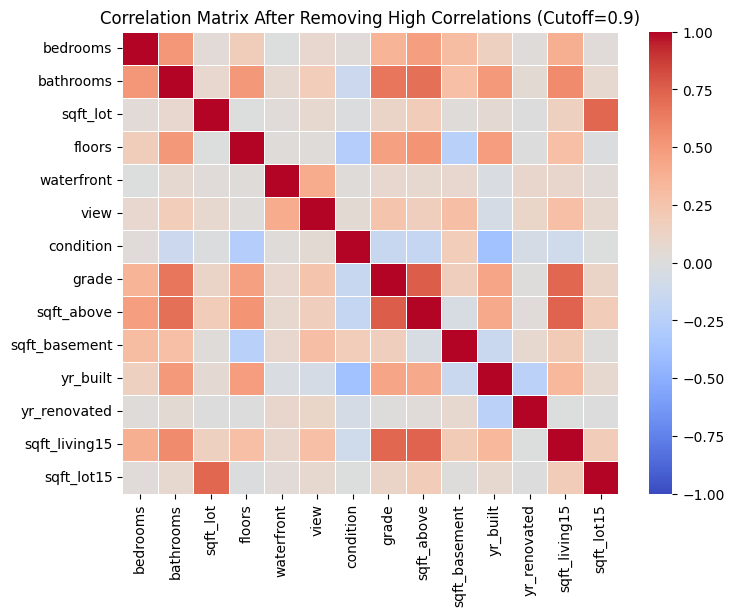

In [ ]:
# --- Removal of highly correlated feature pairs (keeping only one element of the pair) ---
#  data14_reduced, data15_reduced

def find_correlation(df_corr, cutoff=0.9):
    """
    Finds highly correlated features based on a cutoff.
    Returns a list of column names to potentially remove.
    It identifies pairs above the cutoff and flags the column with the higher
    mean absolute correlation across all other columns.
    """
    highly_correlated = set()
    # Ensure the matrix is symmetric and avoid self-correlation
    corr_matrix_upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

    for col in corr_matrix_upper.columns:
        if col in highly_correlated:
            continue
        correlated_cols = corr_matrix_upper.index[abs(corr_matrix_upper[col]) > cutoff].tolist()
        if correlated_cols:
            # Add the current column and its correlated partners to a potential removal list
            cols_to_compare = [col] + correlated_cols
            mean_abs_corr = df_corr.loc[cols_to_compare, cols_to_compare].abs().mean()
            # Flag the column with the highest mean absolute correlation (excluding itself)
            col_to_remove = mean_abs_corr.idxmax()
            highly_correlated.add(col_to_remove)
            # Flag the others involved in this specific high-corr check as well, but prioritize the one flagged above
            for c in cols_to_compare:
                 if c != col_to_remove:
                     # Only add if not already flagged by a *different* check resulting in higher mean corr
                     # This logic is simplified compared to caret but captures the essence.
                     # A more robust version might re-evaluate mean correlations after each removal.
                     highly_correlated.add(c)
            # Refined logic: From the identified group, remove the one with highest mean abs corr
            # Let's try removing just one per group initially - the one with highest mean corr
            cols_to_compare = [col] + correlated_cols
            mean_abs_corr = df_corr[cols_to_compare].abs().mean() # Mean abs corr with *all* features
            col_to_remove = mean_abs_corr.idxmax()
            highly_correlated.add(col_to_remove)
            # Remove the other columns found in this specific check temporarily to avoid redundant checks
            for c in correlated_cols:
                 corr_matrix_upper[c] = 0 # Zero out column to avoid re-checking


    # Correcting the logic: caret finds pairs > cutoff, then removes the one with higher mean abs corr.
    highly_correlated_final = set()
    corr_matrix_abs = df_corr.abs()
    corr_matrix_upper_abs = corr_matrix_abs.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

    while True:
        # Find the highest correlation exceeding the cutoff
        max_corr = corr_matrix_upper_abs.max().max()
        if max_corr < cutoff:
            break # No more correlations above cutoff

        # Find the pair with this highest correlation
        row_idx, col_idx = np.where(corr_matrix_upper_abs == max_corr)
        # Get the actual column names (handle potential multiple pairs with same max corr)
        col1 = corr_matrix_upper_abs.index[row_idx[0]]
        col2 = corr_matrix_upper_abs.columns[col_idx[0]]

        # Calculate mean absolute correlation for each column in the pair
        mean_abs_corr1 = corr_matrix_abs[col1].mean()
        mean_abs_corr2 = corr_matrix_abs[col2].mean()

        # Add the column with the higher mean absolute correlation to the set to remove
        if mean_abs_corr1 > mean_abs_corr2:
            col_to_remove = col1
        else:
            col_to_remove = col2 # If equal, remove the second one

        highly_correlated_final.add(col_to_remove)

        # Remove the flagged column from consideration by setting its correlations to 0
        corr_matrix_upper_abs.loc[col_to_remove, :] = 0
        corr_matrix_upper_abs.loc[:, col_to_remove] = 0

    return list(highly_correlated_final)

corr_matrix14 = data14.corr()
corr_matrix15 = data15.corr()

print("Finding highly correlated features (cutoff=0.9)...")
cols_to_drop = find_correlation(corr_matrix14, cutoff=0.8)
print(f"Columns to drop due to high correlation: {cols_to_drop}")

data14_reduced = data14.drop(columns=cols_to_drop)
data15_reduced = data15.drop(columns=cols_to_drop)

print(f"Data 2016 shape after removing correlated features: {data14_reduced.shape}")
print(f"Data 2017 shape after removing correlated features: {data15_reduced.shape}")

print("Visualizing correlation matrix after removing highly correlated features...")
corr_matrix16_reduced = data14_reduced.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix16_reduced, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt=".1f", linewidths=.5)
plt.title("Correlation Matrix After Removing High Correlations (Cutoff=0.9)")
plt.show()

# Assigning target labels

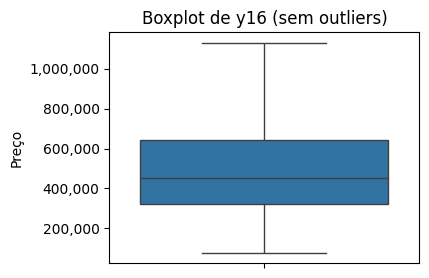

In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(4, 3))
sns.boxplot(data=y14, showfliers=False)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.ylabel('Preço')
plt.title('Boxplot de y16 (sem outliers)')
plt.show()

Cria variavel categorica para indicar se está  nos 20% maiores: y14_factor e y15_factor pra separar

In [ ]:
# criar um fator que vale 1 se o valor não estiver no top 20% e 2 se estiver no top 20%.
# Isso permite criar uma variavel Categorica

cutoff = y14.quantile(0.8)
y14_factor = (y14 > cutoff).astype(int) + 1

print("\nClass distribution for 2014 (1 if not in top quintile, 2 if in top quintile):")
counts_14 = y14_factor.value_counts().sort_index()
# Check if both classes exist before printing (handles cases where data might be skewed)
if 1 not in counts_14: counts_14[1] = 0
if 2 not in counts_14: counts_14[2] = 0
counts_14 = counts_14.sort_index() # Ensure order after potentially adding keys
for index, value in counts_14.items():
    print(f"{index}    {value}")

print("\n")
print("*" * 100)
print("\n")

########## 2015 ************
cutoff = y14.quantile(0.8)
y15_factor = (y15 > cutoff).astype(int) + 1

print("\nClass distribution for 2015 (1 if not in top quintile, 2 if in top quintile):")
counts_15 = y15_factor.value_counts().sort_index()
# Check if both classes exist before printing (handles cases where data might be skewed)
if 1 not in counts_15: counts_15[1] = 0
if 2 not in counts_15: counts_15[2] = 0
counts_15 = counts_15.sort_index() # Ensure order after potentially adding keys
for index, value in counts_15.items():
    print(f"{index}    {value}")

print("\n")
print("*" * 100)
print("\n")


Class distribution for 2014 (1 if not in top quintile, 2 if in top quintile):
1    11723
2    2910


****************************************************************************************************



Class distribution for 2015 (1 if not in top quintile, 2 if in top quintile):
1    5616
2    1364


****************************************************************************************************




#Train/test split

Escalonamento

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(data14_reduced)
#converte p/ dataframe
data14_scaled = pd.DataFrame(scaled, index=data14_reduced.index, columns=data14_reduced.columns)

scaled = scaler.fit_transform(data15_reduced)
#converte p/ dataframe
data15_scaled = pd.DataFrame(scaled, index=data15_reduced.index, columns=data15_reduced.columns)

X_train e Y_Train serão os dados de 2014

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test_14, y_train, y_test_14 = train_test_split(
    data14_scaled,
    y14_factor,
    test_size=.25,
    random_state=0)

print(f"Training set shape: {X_train.shape}")
print(f"Test set 2014 shape: {X_test_14.shape}")

X_train, X_test_15, y_train, y_test_15 = train_test_split(
    data15_scaled,
    y15_factor,
    test_size=.25,
    random_state=0)

print(f"Training set shape: {X_train.shape}")
print(f"Test set 2014 shape: {X_test_14.shape}")

Training set shape: (10974, 14)
Test set 2014 shape: (3659, 14)
Training set shape: (5235, 14)
Test set 2014 shape: (3659, 14)


# Arvore de Decisao

<h3>Faz cross-validation para encontrar media de Accuracy</h3>

Ajuda a diagnosticar overfitting — se o erro de treino (TR Error) for muito menor que o de validação (VA Error), a árvore está sobreajustada.

Bom ajuste: Acurácias altas e próximas (diferença até ~5 p.p.).
Ex.: Treino 0.88, Teste 0.85

Overfitting: Treino muito maior que teste (diferença > 10 p.p.).
Ex.: Treino 0.99, Teste 0.70

Underfitting: Ambas baixas e próximas → modelo fraco.
Ex.: Treino 0.65, Teste 0.63<

In [ ]:
# --- Cross-Validation Setup ---
k = 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

# --- Single Tree ---
cv_results_tree = {'fold': [], 'Acc_treino': [], 'Acc_teste': [],'diff_pct': []}
fold_counter = 1

for train_idx, val_idx in cv.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # treina o modelo Arvore de Decisao
    my_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
    my_tree.fit(X_cv_train, y_cv_train)

    # calacula as prediçoes para treino e teste
    pred_train = my_tree.predict(X_cv_train)
    pred_val = my_tree.predict(X_cv_val)


    cv_results_tree['fold'].append(fold_counter)


    # calcula acurracy do treino
    acuracia_treino = accuracy_score(y_cv_train, pred_train)
    cv_results_tree['Acc_treino'].append(acuracia_treino)

    # calcula acurracy do teste
    acuracia_teste =  accuracy_score(y_cv_val, pred_val)
    cv_results_tree['Acc_teste'].append(acuracia_teste)

    diff_pct = abs(acuracia_treino - acuracia_teste) / acuracia_treino * 100 if acuracia_treino!=0 else 0
    cv_results_tree['diff_pct'].append(diff_pct)

    fold_counter += 1

cv_results_tree_df = pd.DataFrame(cv_results_tree)
print("CV Results (Single Tree):")
print(cv_results_tree_df)
mean_acuracia_teste = cv_results_tree_df['Acc_teste'].mean()
print(f"\nMean Accuracy Teste (Single Tree): {mean_acuracia_teste:.4f}")

CV Results (Single Tree):
   fold  Acc_treino  Acc_teste   diff_pct
0     1    1.000000   0.859745  14.025501
1     2    0.999797   0.867031  13.279342
2     3    0.999797   0.872495  12.732783
3     4    0.999797   0.869763  13.006062
4     5    0.999899   0.862352  13.756081
5     6    0.999798   0.868733  13.109115
6     7    0.999798   0.841386  15.844400
7     8    0.999798   0.870556  12.926762
8     9    0.999798   0.866910  13.291467
9    10    0.999899   0.863263  13.664914

Mean Accuracy Teste (Single Tree): 0.8642


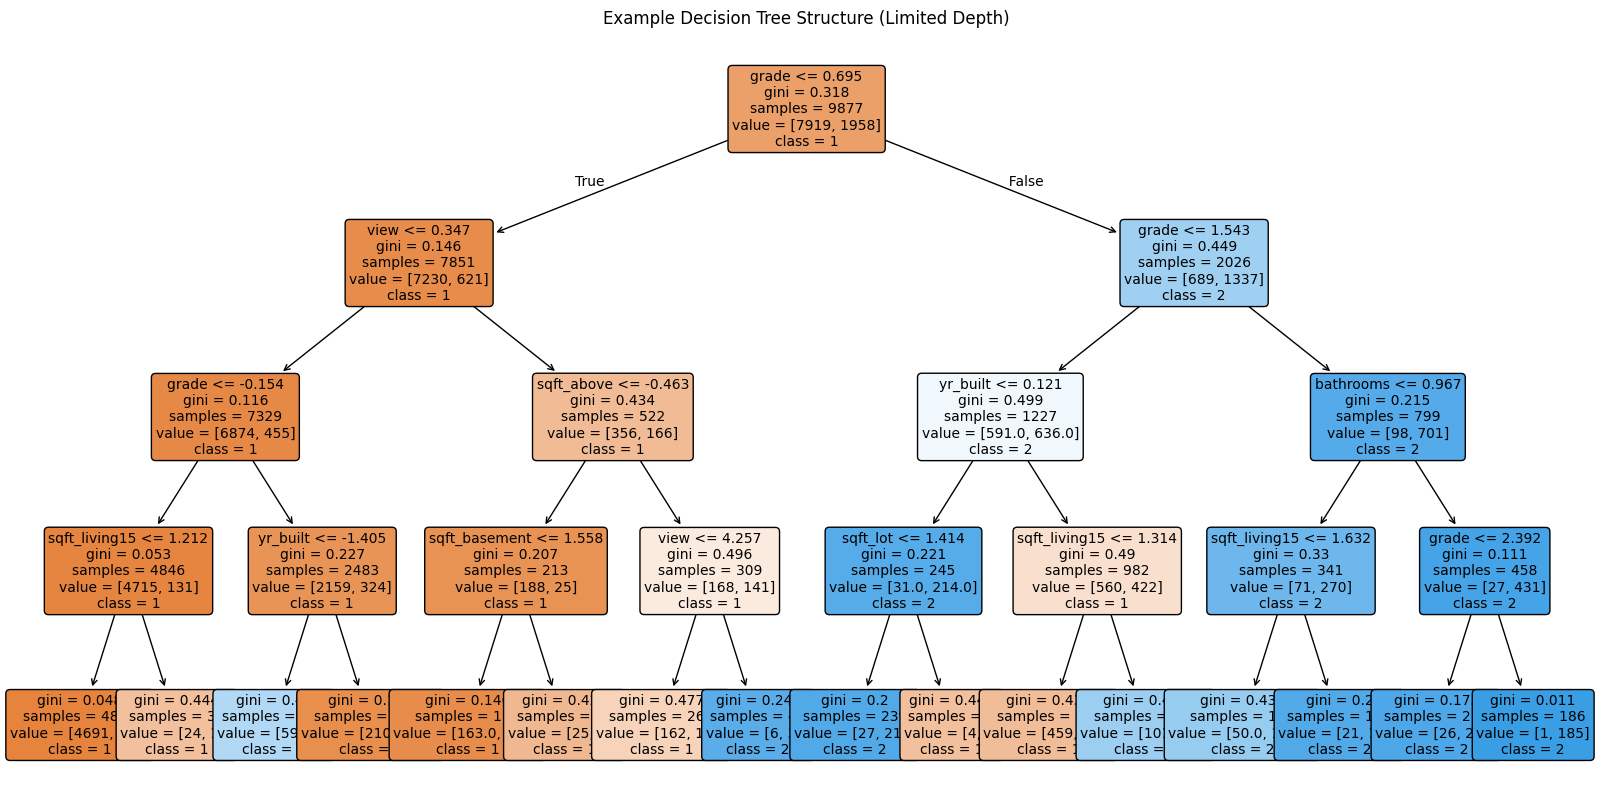

In [ ]:
# --- Single Tree model visualization ---
feature_names = X_train.columns.tolist()
class_names = [str(c) for c in sorted(y_train.unique())] # ['1', '2']

last_train_idx, last_val_idx = list(cv.split(X_train, y_train))[-1]
X_last_cv_train, y_last_cv_train = X_train.iloc[last_train_idx], y_train.iloc[last_train_idx]
final_tree_viz = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=4) # Limit depth for viz
final_tree_viz.fit(X_last_cv_train, y_last_cv_train)

plt.figure(figsize=(20, 10))
plot_tree(final_tree_viz,
          filled=True,
          rounded=True,
          feature_names=feature_names,
          class_names=class_names,
          fontsize=10)
plt.title("Example Decision Tree Structure (Limited Depth)")
plt.show()

# Random Forest

Faz cross-validation com dados de 2014, para encontrrar media de Accuracy

Tunnig p/ encontrar melhores parametros


*   n_estimators	Número de árvores na floresta	Mais árvores = modelo mais robusto, mas mais lento

*   max_depth	Profundidade máxima de cada árvore	Limita complexidade; evita overfitting se for baixo

*   min_samples_split	Mínimo de amostras necessárias para dividir um nó	Controla crescimento da árvore

*   min_samples_leaf	Mínimo de amostras em cada folha	Evita folhas muito pequenas (overfitting)

*   max_features	Número máximo de variáveis consideradas em cada divisão	Controla aleatoriedade e diversidade das árvores

*   bootstrap	Se amostras são com reposição (True) ou não	Bootstrap True = Random
Forest clássico; False = Extra Trees

*   criterion	Métrica usada para medir qualidade da divisão (ex.: 'gini', 'entropy')	Afeta a form

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


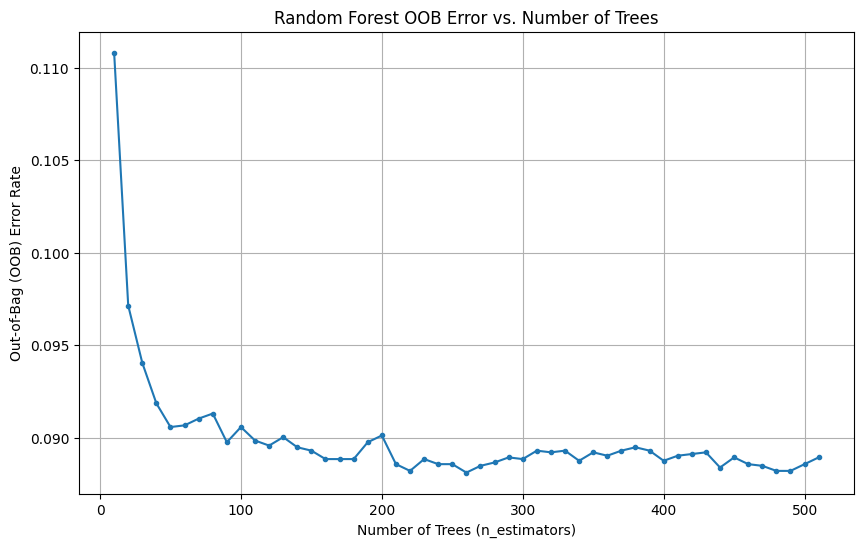

In [ ]:
# faz loop com numero de arvores de 10 ate 513
# acha o oob_score que é uma metrica de erro

rf_oob = RandomForestClassifier(n_estimators=512,
                                random_state=RANDOM_STATE,
                                oob_score=True,
                                n_jobs=-1,
                                warm_start=True)

oob_errors = []
min_estimators = 10
for n_estimators in range(min_estimators, 513, 10):
    rf_oob.set_params(n_estimators=n_estimators)
    rf_oob.fit(X_train, y_train)
    if rf_oob.oob_score_:
        oob_errors.append(1.0 - rf_oob.oob_score_)
    else:
        oob_errors.append(np.nan)

plt.figure(figsize=(10, 6))
plt.plot(range(min_estimators, 513, 10), oob_errors, marker='.')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Out-of-Bag (OOB) Error Rate")
plt.title("Random Forest OOB Error vs. Number of Trees")
plt.grid(True)
plt.show()

tunning do Curso

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros={'criterion':['gini','entropy'],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,10],
            'n_estimators':[10,40,100,150,200]
            }
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros)
grid.fit(X_train, y_train)
print (grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40} 0.913886827400469


Validação Cruzada com dados de 2014

Executa com n_estimator=200 (melhor para metro)

In [ ]:
# --- Getting the metrics for the final version of the Random Forest --- [TO DO]
print("\n--- Training Improved Random Forest (ntree=200, balanced) with Cross-Validation ---")

k = 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

cv_results_rf_imp = {'fold': [], 'TR error': [], 'TR accuracy': [],'VA error': [],'VA accuracy':[], 'Precision': [], 'Classification Rate': [], 'Recall': []}
fold_counter = 1

for train_idx, val_idx in cv.split(X_train, y_train):
    X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # treina o modelo
    my_rforest_imp = RandomForestClassifier(
        n_estimators=200,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    my_rforest_imp.fit(X_cv_train, y_cv_train)

    cv_results_rf_imp['fold'].append(fold_counter)

    # usa base de treino p/ predizer
    pred_train = my_rforest_imp.predict(X_cv_train)
    tr_error = 1.0 - accuracy_score(y_cv_train, pred_train)
    tr_accuracy = accuracy_score(y_cv_train, pred_train)
    cv_results_rf_imp['TR error'].append(tr_error)
    cv_results_rf_imp['TR accuracy'].append(tr_accuracy)

    # usa base de teste p/ predizer
    pred_val = my_rforest_imp.predict(X_cv_val)
    va_error = 1.0 - accuracy_score(y_cv_val, pred_val)
    va_accuracy = accuracy_score(y_cv_val, pred_val)
    cv_results_rf_imp['VA error'].append(va_error)
    cv_results_rf_imp['VA accuracy'].append(va_accuracy)

    # Calculate metrics for the validation set
    precision = precision_score(y_cv_val, pred_val, pos_label=2, zero_division=0) # R uses 1 if NaN, sklearn uses 0
    cv_results_rf_imp['Precision'].append(precision if not np.isnan(precision) else 1.0) # NaN -> 1 for precision

    recall = recall_score(y_cv_val, pred_val, pos_label=2, zero_division=0)
    cv_results_rf_imp['Recall'].append(recall if not np.isnan(recall) else 1.0) # NaN -> 1 for recall

    # Classification rate is just accuracy in this binary case
    class_rate = accuracy_score(y_cv_val, pred_val)
    cv_results_rf_imp['Classification Rate'].append(class_rate)

    fold_counter += 1

cv_results_rf_imp_df = pd.DataFrame(cv_results_rf_imp)
print("CV Results (Improved Random Forest):")
print(cv_results_rf_imp_df)

print("\nCV Error (Mean Validation Error):")
mean_va_error_rf_imp = cv_results_rf_imp_df['VA error'].mean()
print(f"{mean_va_error_rf_imp:.4f}")

print("Precision (Mean Validation):")
mean_precision_rf_imp = cv_results_rf_imp_df['Precision'].mean()
print(f"{mean_precision_rf_imp:.4f}")

print("Classification Rate (Mean Validation Accuracy):")
mean_class_rate_rf_imp = cv_results_rf_imp_df['Classification Rate'].mean()
print(f"{mean_class_rate_rf_imp:.4f}")

print("Recall (Mean Validation):")
mean_recall_rf_imp = cv_results_rf_imp_df['Recall'].mean()
print(f"{mean_recall_rf_imp:.4f}")


--- Training Improved Random Forest (ntree=200, balanced) with Cross-Validation ---
CV Results (Improved Random Forest):
   fold  TR error  TR accuracy  VA error  VA accuracy  Precision  \
0     1  0.000000     1.000000  0.091985     0.908015   0.812834   
1     2  0.000203     0.999797  0.083789     0.916211   0.846154   
2     3  0.000203     0.999797  0.101093     0.898907   0.802260   
3     4  0.000203     0.999797  0.078324     0.921676   0.833333   
4     5  0.000101     0.999899  0.085688     0.914312   0.829787   
5     6  0.000202     0.999798  0.087511     0.912489   0.823529   
6     7  0.000202     0.999798  0.089335     0.910665   0.818182   
7     8  0.000202     0.999798  0.090246     0.909754   0.795000   
8     9  0.000202     0.999798  0.085688     0.914312   0.828877   
9    10  0.000101     0.999899  0.084777     0.915223   0.856322   

   Classification Rate    Recall  
0             0.908015  0.697248  
1             0.916211  0.706422  
2             0.898907  

testando em 2014 e 2015


In [ ]:
# --- Test Random Forest
print("\n--- Testing Final Random Forest Model on Hold-Out Sets ---")

# Train the final model on the *full* training set (X_train, y_train)
final_rforest = RandomForestClassifier(
    n_estimators =200 ,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
final_rforest.fit(X_train, y_train)

# Evaluate on 2014 Test Set (X_test_14, y_test_14)
pred_test_14 = final_rforest.predict(X_test_14)
print("\n--- 2014 Test Set Performance ---")
test_14_error = 1.0 - accuracy_score(y_test_14, pred_test_14)
test_14_precision = precision_score(y_test_14, pred_test_14, pos_label=2, zero_division=0)
test_14_recall = recall_score(y_test_14, pred_test_14, pos_label=2, zero_division=0)
test_14_class_rate = accuracy_score(y_test_14, pred_test_14)

print(f"2014 test error (1 - accuracy): {test_14_error:.4f}")
print(f"2014 test precision: {test_14_precision:.4f}")
print(f"2014 test classification rate (accuracy): {test_14_class_rate:.4f}")
print(f"2014 test recall: {test_14_recall:.4f}")

# Evaluate on 2015 Test Set (X_test_15, y_test_15)
pred_test_15 = final_rforest.predict(X_test_15)
print("\n--- 2015 Test Set Performance")
test_15_error = 1.0 - accuracy_score(y_test_15, pred_test_15)
test_15_precision = precision_score(y_test_15, pred_test_15, pos_label=2, zero_division=0)
test_15_recall = recall_score(y_test_15, pred_test_15, pos_label=2, zero_division=0)
test_15_class_rate = accuracy_score(y_test_15, pred_test_15)

print(f"2015 test error (1 - accuracy): {test_15_error:.4f}")
print(f"2015 test precision: {test_15_precision:.4f}")
print(f"2015 test classification rate (accuracy): {test_15_class_rate:.4f}")
print(f"2015 test recall: {test_15_recall:.4f}")


--- Testing Final Random Forest Model on Hold-Out Sets ---

--- 2014 Test Set Performance ---
2014 test error (1 - accuracy): 0.0913
2014 test precision: 0.8148
2014 test classification rate (accuracy): 0.9087
2014 test recall: 0.7061

--- 2015 Test Set Performance
2015 test error (1 - accuracy): 0.1054
2015 test precision: 0.7943
2015 test classification rate (accuracy): 0.8946
2015 test recall: 0.6400


Treina modelo com todos os dados do ano

In [ ]:
# --- Test Random Forest
print("\n--- Testing Final Random Forest Model on Hold-Out Sets ---")

# Train the final model on the *full* training set (X_train, y_train)
final_rforest = RandomForestClassifier(
    n_estimators =200 ,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
final_rforest.fit(data14_scaled, y14_factor)

# Evaluate on 2014 Test Set (X_test_14, y_test_14)
pred_test_14 = final_rforest.predict(X_test_14)
print("\n--- 2014 Test Set Performance ---")
test_14_error = 1.0 - accuracy_score(y_test_14, pred_test_14)
test_14_precision = precision_score(y_test_14, pred_test_14, pos_label=2, zero_division=0)
test_14_recall = recall_score(y_test_14, pred_test_14, pos_label=2, zero_division=0)
test_14_class_rate = accuracy_score(y_test_14, pred_test_14)

print(f"2014 test error (1 - accuracy): {test_14_error:.4f}")
print(f"2014 test precision: {test_14_precision:.4f}")
print(f"2014 test classification rate (accuracy): {test_14_class_rate:.4f}")
print(f"2014 test recall: {test_14_recall:.4f}")

# Evaluate on 2015 Test Set (X_test_15, y_test_15)
pred_test_15 = final_rforest.predict(X_test_15)
print("\n--- 2015 Test Set Performance")
test_15_error = 1.0 - accuracy_score(y_test_15, pred_test_15)
test_15_precision = precision_score(y_test_15, pred_test_15, pos_label=2, zero_division=0)
test_15_recall = recall_score(y_test_15, pred_test_15, pos_label=2, zero_division=0)
test_15_class_rate = accuracy_score(y_test_15, pred_test_15)

print(f"2015 test error (1 - accuracy): {test_15_error:.4f}")
print(f"2015 test precision: {test_15_precision:.4f}")
print(f"2015 test classification rate (accuracy): {test_15_class_rate:.4f}")
print(f"2015 test recall: {test_15_recall:.4f}")


--- Testing Final Random Forest Model on Hold-Out Sets ---

--- 2014 Test Set Performance ---
2014 test error (1 - accuracy): 0.0000
2014 test precision: 1.0000
2014 test classification rate (accuracy): 1.0000
2014 test recall: 1.0000

--- 2015 Test Set Performance
2015 test error (1 - accuracy): 0.1043
2015 test precision: 0.7958
2015 test classification rate (accuracy): 0.8957
2015 test recall: 0.6457


#  Backtesting


In [ ]:
import yfinance as yf
import cvxpy as cp
import numpy as np
import pandas as pd

#supondo que essas sejam as escolhidas pelo modelo
ticker = ['PETR4.SA','ITSA4.SA','VALE3.SA','EGIE3.SA']
df = yf.download(ticker, start="2024-01-01", end="2025-01-01")  # período de 1 ano

#df.columns = df.columns.droplevel('Ticker')
#df = df.reset_index()
returns = df["Close"].pct_change().dropna()
n_assets = returns.shape[1]

/tmp/ipython-input-1218655974.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2024-01-01", end="2025-01-01")  # período de 1 ano
[*********************100%***********************]  4 of 4 completed


In [ ]:
rebalance_freq = 21 # rebalanceamento mensal
rebalance_indices = list(range(0, len(returns), rebalance_freq))

markowitz_weights_list = []
equal_weights_list = []  # 1/N portfolio weights
rebalance_dates = []

markowitz_ret_series = pd.Series(dtype=float)
equal_ret_series = pd.Series(dtype=float)  # 1/N portfolio returns

for idx in rebalance_indices:
    if idx == 0:
        # inicializa pesos com  1/N
        w_markowitz = np.ones(n_assets) / n_assets
        w_equal = np.ones(n_assets) / n_assets
    else:
        train = returns.iloc[idx-rebalance_freq : idx]
        Sigma = train.cov()
        mu = train.mean().values

        w_var = cp.Variable(n_assets)
        # aversao ao risco
        lmbd = 5.0
        # função objetivo: max (mu^T w - λ * risco)
        objective = cp.Maximize(mu @ w_var - lmbd * cp.quad_form(w_var, Sigma))
        # restrições: soma = 1, pesos >= 0
        constraints = [cp.sum(w_var) == 1, w_var >= 0]
        # define e resolve
        prob = cp.Problem(objective, constraints)
        prob.solve()

        w_markowitz = w_var.value

        # Equally weighted portfolio (equal weights)
        w_equal = np.ones(n_assets) / n_assets

    # append na lista
    markowitz_weights_list.append(w_markowitz)
    equal_weights_list.append(w_equal)
    rebalance_dates.append(returns.index[idx])

    # markowitz_test_ret e equal_test_ret -> retorno na prox janela de 30 dias
    next_idx = idx + rebalance_freq
    test = returns.iloc[idx : next_idx]
    markowitz_test_ret = test.dot(w_markowitz)
    equal_test_ret = test.dot(w_equal)

    # append na lista
    markowitz_ret_series = pd.concat([markowitz_ret_series, markowitz_test_ret])
    equal_ret_series = pd.concat([equal_ret_series, equal_test_ret])


/tmp/ipython-input-1895944157.py:48: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  markowitz_ret_series = pd.concat([markowitz_ret_series, markowitz_test_ret])
/tmp/ipython-input-1895944157.py:49: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  equal_ret_series = pd.concat([equal_ret_series, equal_test_ret])


In [ ]:
equal_ret_series

,0
2024-01-03,0.005906
2024-01-04,-0.009409
2024-01-05,0.002221
2024-01-08,-0.006661
2024-01-09,-0.002375
...,...
2024-12-20,0.009199
2024-12-23,-0.010390
2024-12-26,0.005169
2024-12-27,-0.008389
